In [ ]:
import Pkg
using Pkg
Pkg.add("ForwardDiff")

In [ ]:
Pkg.build("PyCall")
Pkg.build("PyPlot")

In [ ]:
using PyCall
#run(`$(PyCall.python) -m pip install --upgrade cython`)
#run(`$(PyCall.python) -m pip install plfit`)
#plfit= pyimport("plfit")
#Pkg.add("Conda")
PyCall.pyprogramname
using Conda
run(`$(PyCall.python) -m pip install matplotlib`)

In [15]:
PyCall.python

"C:\\Users\\Michishita\\.julia\\conda\\3\\python.exe"

In [5]:
using PyPlot
using LinearAlgebra
using Statistics
using ForwardDiff 

数値微分の練習

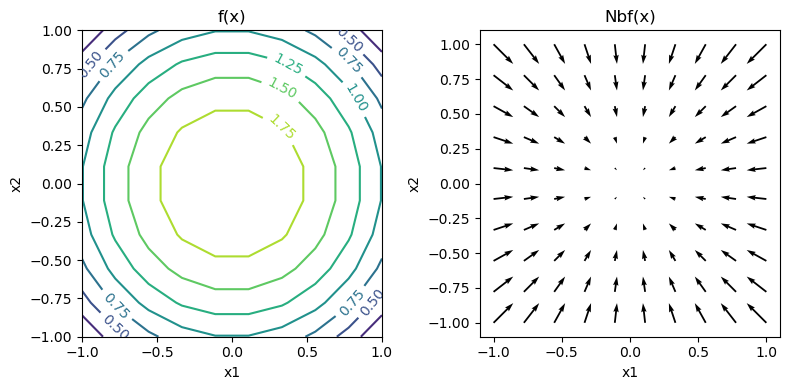

In [17]:
L = 10
xv1 = range(-1, 1, length=L)
xv2 = range(-1, 1, length=L)

#.+でブロードキャストして１を足す＝＞全体はベクトルなので転地(dagger)取って足し上げ
f(x) = -(x .+ 1)' * (x .- 1)
h = 1.0e-10
Nbf(x) = -2x

fig, axes = subplots(1,2, figsize=(8,4))

cs = axes[1].contour(xv1, xv2, [f([x1,x2]) for x1 in xv1, x2 in xv2]')
axes[1].clabel(cs, inline=true)
axes[1].set_xlabel("x1"), axes[1].set_ylabel("x2")
axes[1].set_title("f(x)")

vec1 = [Nbf([x1, x2])[1] for x1 in xv1, x2 in xv2]
vec2 = [Nbf([x1, x2])[2] for x1 in xv1, x2 in xv2]
axes[2].quiver(repeat(xv1, 1, L), repeat(xv2', 1, L), vec1, vec2)
axes[2].set_xlabel("x1"), axes[2].set_ylabel("x2")
axes[2].set_title("Nbf(x)")

tight_layout()


自動微分を使ってみる(便利だぁ。。)

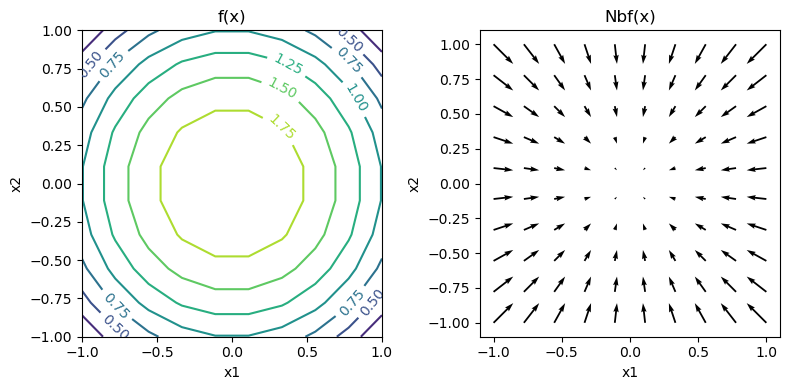

In [20]:

gradf(x) = ForwardDiff.gradient(f, x)

fig, axes = subplots(1,2, figsize=(8,4))

cs = axes[1].contour(xv1, xv2, [f([x1,x2]) for x1 in xv1, x2 in xv2]')
axes[1].clabel(cs, inline=true)
axes[1].set_xlabel("x1"), axes[1].set_ylabel("x2")
axes[1].set_title("f(x)")

vec1 = [gradf([x1, x2])[1] for x1 in xv1, x2 in xv2]
vec2 = [gradf([x1, x2])[2] for x1 in xv1, x2 in xv2]
axes[2].quiver(repeat(xv1, 1, L), repeat(xv2', 1, L), vec1, vec2)
axes[2].set_xlabel("x1"), axes[2].set_ylabel("x2")
axes[2].set_title("Nbf(x)")

tight_layout()